In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns

In [2]:
def func(x, a, b, c):
     return a * np.exp(-b * x) + c

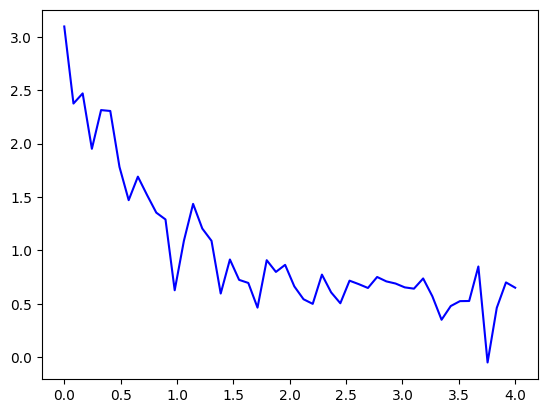

In [12]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

In [10]:
popt, pcov = curve_fit(func, xdata, ydata)
popt

array([2.54887821, 1.43030639, 0.51875743])

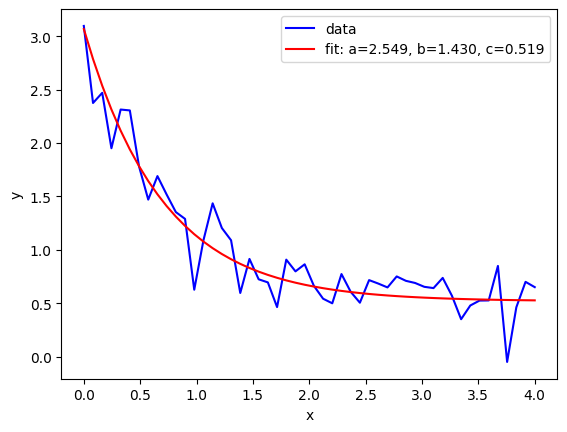

In [14]:
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-',
          label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [7]:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt

array([2.40092716, 1.        , 0.37777312])

In [8]:
plt.show()

In [18]:
data=pd.read_csv('/Users/Joseph/Desktop/tap_output.csv')
print(data.head())

   Unnamed: 0     time  dura   dist      prob     speed  plate  taps  \
0           0  599.959  3.21  0.581  0.803922  0.180997      1   1.0   
1           1  609.960  2.54  0.509  0.648148  0.200394      1   2.0   
2           2  619.914  1.84  0.409  0.750000  0.222283      1   3.0   
3           3  629.897  1.73  0.364  0.474576  0.210405      1   4.0   
4           4  639.989  1.21  0.247  0.536232  0.204132      1   5.0   

          dataset      Gene Allele  
0  F32D8.13_gk584  F32D8.13  gk584  
1  F32D8.13_gk584  F32D8.13  gk584  
2  F32D8.13_gk584  F32D8.13  gk584  
3  F32D8.13_gk584  F32D8.13  gk584  
4  F32D8.13_gk584  F32D8.13  gk584  


In [40]:
N2_data=data[data.Gene=='N2']
N2_data=N2_data[N2_data.taps != 31.0].drop(columns=['Unnamed: 0'])
print(N2_data)

         time  dura   dist      prob     speed  plate  taps dataset Gene  \
279   599.962  2.59  0.562  0.944444  0.216988      1   1.0      N2   N2   
280   609.963  2.17  0.552  0.843750  0.254378      1   2.0      N2   N2   
281   619.961  2.41  0.674  0.787879  0.279668      1   3.0      N2   N2   
282   629.925  2.08  0.519  0.861111  0.249519      1   4.0      N2   N2   
283   639.984  1.56  0.363  0.692308  0.232692      1   5.0      N2   N2   
...       ...   ...    ...       ...       ...    ...   ...     ...  ...   
5493  849.956  0.92  0.195  0.263158  0.211957    169  26.0      N2   N2   
5494  859.963  1.07  0.223  0.137931  0.208411    169  27.0      N2   N2   
5495  869.919  1.03  0.208  0.304348  0.201942    169  28.0      N2   N2   
5496  879.964  0.81  0.161  0.204082  0.198765    169  29.0      N2   N2   
5497  889.963  1.12  0.208  0.236364  0.185714    169  30.0      N2   N2   

     Allele  
279      N2  
280      N2  
281      N2  
282      N2  
283      N2  
...

In [41]:
N2_mean=N2_data.groupby(['taps','Gene','dataset','Allele'], as_index=False).mean()
print(N2_mean)

    taps Gene dataset Allele        time      dura      dist      prob  \
0    1.0   N2      N2     N2  599.960834  2.660592  0.597136  0.827603   
1    2.0   N2      N2     N2  609.957751  2.308402  0.580225  0.764884   
2    3.0   N2      N2     N2  619.949351  2.038512  0.555583  0.692157   
3    4.0   N2      N2     N2  629.950583  1.852083  0.489060  0.634027   
4    5.0   N2      N2     N2  639.956905  1.631250  0.411315  0.592466   
5    6.0   N2      N2     N2  649.955976  1.466805  0.358645  0.548303   
6    7.0   N2      N2     N2  659.952833  1.443095  0.344935  0.506866   
7    8.0   N2      N2     N2  669.954673  1.418452  0.339887  0.482774   
8    9.0   N2      N2     N2  679.953581  1.455629  0.342581  0.469123   
9   10.0   N2      N2     N2  689.959292  1.419405  0.330851  0.454732   
10  11.0   N2      N2     N2  699.955500  1.466369  0.338000  0.442138   
11  12.0   N2      N2     N2  709.961435  1.460714  0.337024  0.415319   
12  13.0   N2      N2     N2  719.9577

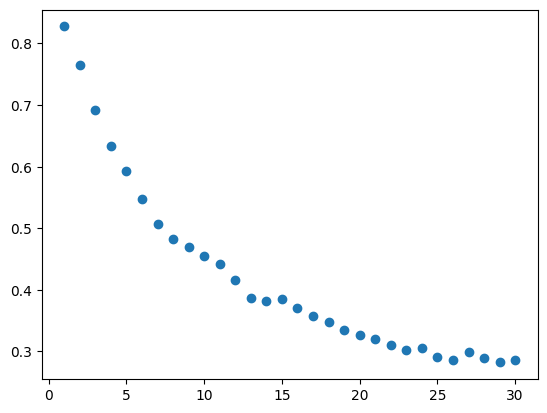

In [213]:
plt.scatter(N2_mean.taps, N2_mean.prob, label='data')

In [273]:
popt, pcov = curve_fit(func, N2_mean.taps, N2_mean.prob)
p_sigma = np.sqrt(np.diag(pcov))
print(popt)
p_upp=popt+p_sigma
p_low=popt-p_sigma
print(p_upp)
print(p_low)

[0.61418207 0.1286403  0.27736307]
[0.62274156 0.13309749 0.28233974]
[0.60562259 0.12418312 0.27238641]


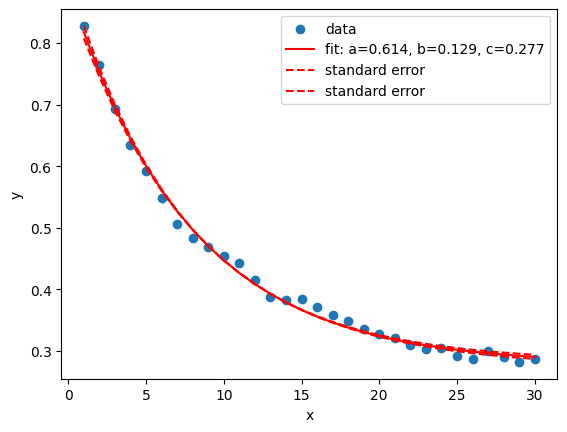

In [225]:
plt.scatter(N2_mean.taps, N2_mean.prob, label='data')
plt.plot(N2_mean.taps, func(N2_mean.taps, *popt), 'r-',
          label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(N2_mean.taps, func(N2_mean.taps, *p_upp), 'r--',
          label='standard error')
plt.plot(N2_mean.taps, func(N2_mean.taps, *p_low), 'r--',
          label='standard error')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [219]:
cat2_data=data[data.Gene=='cat-2']
cat2_data=cat2_data[cat2_data.taps != 31.0]
print(cat2_data)

      Unnamed: 0     time  dura   dist      prob     speed  plate  taps  \
6521           0  599.942  3.36  0.755  0.857143  0.224702      1   1.0   
6522           1  609.897  2.15  0.526  0.657143  0.244651      1   2.0   
6523           2  619.941  2.45  0.596  0.589744  0.243265      1   3.0   
6524           3  629.938  1.98  0.514  0.520833  0.259596      1   4.0   
6525           4  639.987  2.26  0.578  0.510638  0.255752      1   5.0   
...          ...      ...   ...    ...       ...       ...    ...   ...   
6978         148  849.985  1.54  0.363  0.142857  0.235714      5  26.0   
6979         149  859.980  1.15  0.291  0.235294  0.253043      5  27.0   
6980         150  869.997  0.70  0.123  0.160000  0.175714      5  28.0   
6981         151  879.974  1.31  0.318  0.166667  0.242748      5  29.0   
6982         152  889.988  1.30  0.315  0.250000  0.242308      5  30.0   

           dataset   Gene  Allele  
6521   cat-2_e1112  cat-2   e1112  
6522   cat-2_e1112  cat-2  

In [220]:
cat2_mean=cat2_data.groupby(['taps','Gene'], as_index=False).mean()
print(cat2_mean)

    taps   Gene  Unnamed: 0        time      dura      dist      prob  \
0    1.0  cat-2   61.666667  599.966267  3.066000  0.740533  0.773902   
1    2.0  cat-2   62.666667  609.959933  2.130667  0.541400  0.618351   
2    3.0  cat-2   63.666667  619.966600  1.966000  0.522267  0.522782   
3    4.0  cat-2   66.857143  629.967714  1.901429  0.472000  0.517630   
4    5.0  cat-2   65.600000  639.934800  1.803333  0.451067  0.450694   
5    6.0  cat-2   66.600000  649.958000  1.712667  0.412133  0.423285   
6    7.0  cat-2   67.600000  659.967800  1.637333  0.395533  0.362476   
7    8.0  cat-2   68.600000  669.963267  1.595333  0.397067  0.319279   
8    9.0  cat-2   69.600000  679.966200  1.678000  0.403933  0.295920   
9   10.0  cat-2   70.600000  689.967533  1.729333  0.421467  0.297073   
10  11.0  cat-2   71.600000  699.971667  1.674000  0.406800  0.260689   
11  12.0  cat-2   72.600000  709.973800  1.909333  0.473133  0.206391   
12  13.0  cat-2   73.600000  719.967867  1.985333  

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_46763/2813420875.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



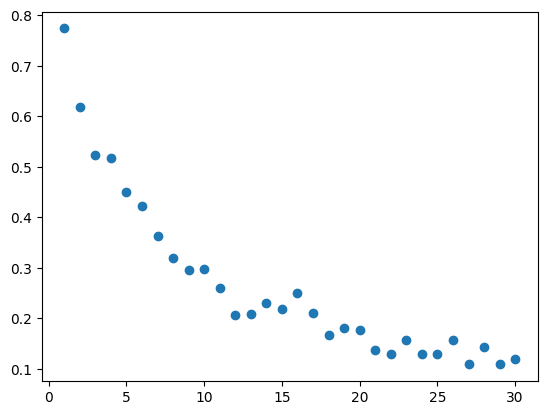

In [221]:
plt.scatter(cat2_mean.taps, cat2_mean.prob, label='data')

In [233]:
cat2_popt, cat2_pcov = curve_fit(func, cat2_data.taps, cat2_data.prob)
cat2_popt
cat2_p_sigma = np.sqrt(np.diag(cat2_pcov))
# print(p_sigma)
cat2_p_upp=cat2_popt+cat2_p_sigma
cat2_p_low=cat2_popt-cat2_p_sigma

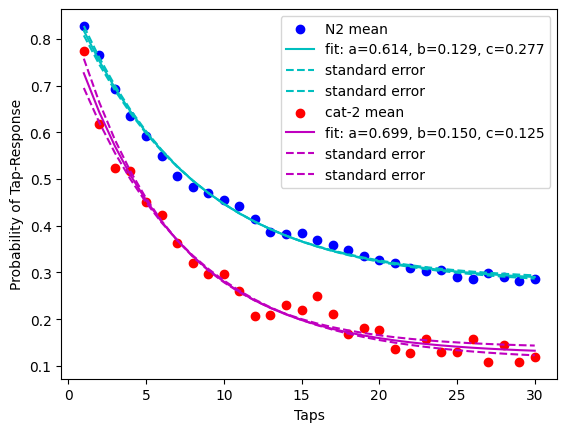

In [275]:
Metric='Probability of Tap-Response'

plt.scatter(N2_mean.taps, N2_mean.prob, c='b', label='N2 mean')
plt.plot(N2_mean.taps, func(N2_mean.taps, *popt), 'c-',
          label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(N2_mean.taps, func(N2_mean.taps, *p_upp), 'c--',
          label='standard error')
plt.plot(N2_mean.taps, func(N2_mean.taps, *p_low), 'c--',
          label='standard error')
plt.scatter(cat2_mean.taps, cat2_mean.prob, c='r', label='cat-2 mean')
plt.plot(cat2_mean.taps, func(cat2_mean.taps, *cat2_popt), 'm-',
          label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(cat2_popt))
plt.plot(N2_mean.taps, func(cat2_mean.taps, *cat2_p_upp), 'm--',
          label='standard error')
plt.plot(N2_mean.taps, func(cat2_mean.taps, *cat2_p_low), 'm--',
          label='standard error')
plt.xlabel('Taps')
plt.ylabel(Metric)
plt.legend()
plt.savefig('/Users/Joseph/Desktop/Probability_Comparison.png', format='png', dpi=450, bbox_inches='tight')
plt.show()

In [ ]:
# import plotly.graph_objects as go
# # Create figure
# fig = go.Figure()


# # Add traces, one for each slider step
# for step in np.arange(0, 5, 0.1):
#     fig.add_trace(
#         go.Scatter(
#             visible=False,
#             line=dict(color="#00CED1", width=6),
#             name="𝜈 = " + str(step),
#             x=np.arange(0, 1, 0.01),
#             y=np.exp(-x)))

# # Make 10th trace visible
# fig.data[10].visible = True

# # Create and add slider
# steps = []
# for i in range(len(fig.data)):
#     step = dict(
#         method="update",
#         args=[{"visible": [False] * len(fig.data)},
#               {"title": "Slider switched to step: " + str(i)}],  # layout attribute
#     )
#     step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
#     steps.append(step)

# sliders = [dict(
#     active=10,
#     currentvalue={"prefix": "Frequency: "},
#     pad={"t": 50},
#     steps=steps
# )]

# fig.update_layout(
#     sliders=sliders
# )

# fig.show()

# Probability

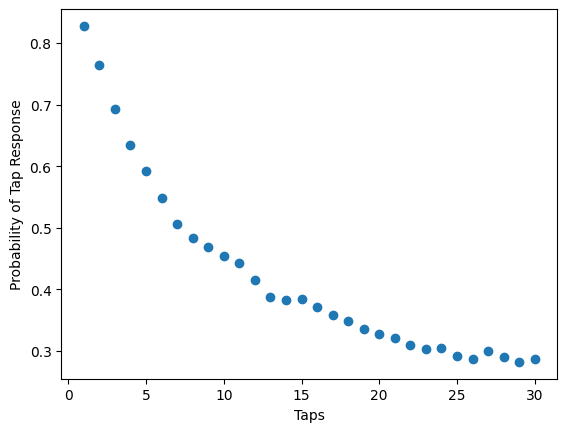

In [261]:
Metric='Probability of Tap Response'
plt.scatter(N2_mean.taps, N2_mean.prob, label='data')
plt.xlabel('Taps')
plt.ylabel(Metric)
plt.savefig('/Users/Joseph/Desktop/N2Probability.png', format='png', dpi=450)
plt.show()
# plt.savefig('/Users/Joseph/Desktop/N2Probability.png', format='png', dpi=450)

In [202]:
def prob_func(x, a, b, c):
     return a * np.exp(-b * x) + c

In [267]:
popt, pcov = curve_fit(prob_func, N2_mean.taps, N2_mean.prob)
print(popt)
print(pcov)
p_sigma = np.sqrt(np.diag(pcov))
print(p_sigma)
p_upp=popt+p_sigma
p_low=popt-p_sigma

[0.61418207 0.1286403  0.27736307]
[[ 7.32648035e-05  1.44413680e-05 -1.31134709e-06]
 [ 1.44413680e-05  1.98665094e-05  1.87199231e-05]
 [-1.31134709e-06  1.87199231e-05  2.47671715e-05]]
[0.00855949 0.00445719 0.00497666]


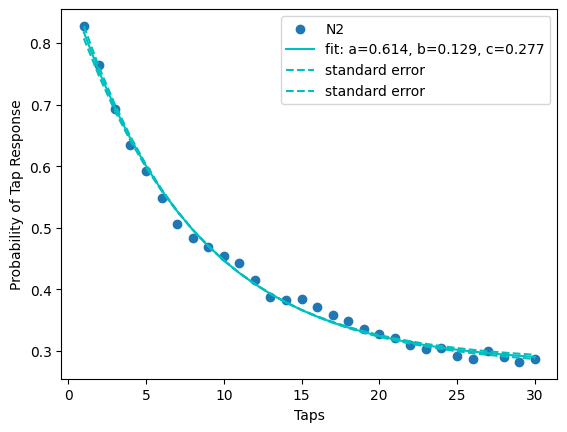

In [268]:
plt.scatter(N2_mean.taps, N2_mean.prob, label='N2')
plt.plot(N2_mean.taps, prob_func(N2_mean.taps, *popt), 'c-',
          label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(N2_mean.taps, prob_func(N2_mean.taps, *p_upp), 'c--',
          label='standard error')
plt.plot(N2_mean.taps, prob_func(N2_mean.taps, *p_low), 'c--',
          label='standard error')
plt.xlabel('Taps')
plt.ylabel(Metric)
plt.legend()
plt.savefig('/Users/Joseph/Desktop/N2Probability_fit.png', format='png', dpi=450, bbox_inches='tight')
plt.show()

# Duration

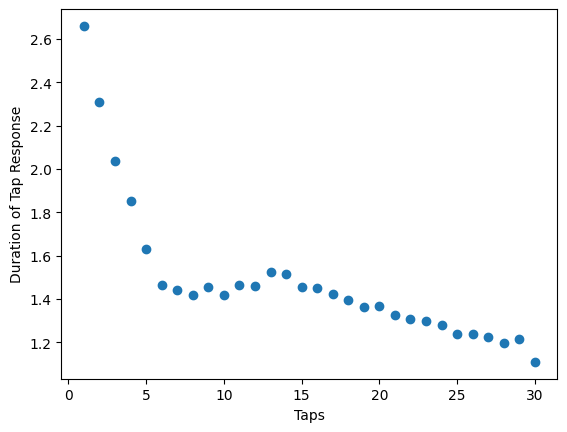

In [245]:
Metric='Duration of Tap Response'
plt.scatter(N2_mean.taps, N2_mean.dura, label='data')
plt.xlabel('Taps')
plt.ylabel(Metric)
plt.show()

In [207]:
def dura_func(x, a, b, c):
     return a * np.exp(-b * x) + c

In [264]:
popt, pcov = curve_fit(dura_func, N2_mean.taps, N2_mean.dura)
print(popt)
print(pcov)
p_sigma = np.sqrt(np.diag(pcov))
print(p_sigma)
p_upp=popt+p_sigma
p_low=popt-p_sigma

[1.84762705 0.32607381 1.32569833]
[[0.02534659 0.0046583  0.00048157]
 [0.0046583  0.00148624 0.00045005]
 [0.00048157 0.00045005 0.00052574]]
[0.15920612 0.0385518  0.02292911]


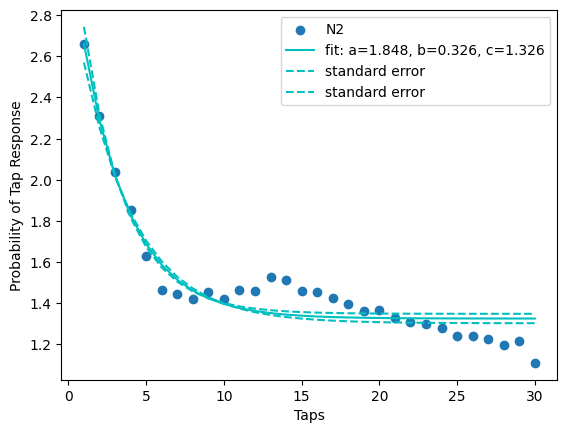

In [266]:
plt.scatter(N2_mean.taps, N2_mean.dura, label='N2')
plt.plot(N2_mean.taps, dura_func(N2_mean.taps, *popt), 'c-',
          label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(N2_mean.taps, dura_func(N2_mean.taps, *p_upp), 'c--',
          label='standard error')
plt.plot(N2_mean.taps, dura_func(N2_mean.taps, *p_low), 'c--',
          label='standard error')
plt.xlabel('Taps')
plt.ylabel(Metric)
plt.legend()
plt.savefig('/Users/Joseph/Desktop/N2Duration_fit.png', format='png', dpi=450, bbox_inches='tight')
plt.show()

# Speed

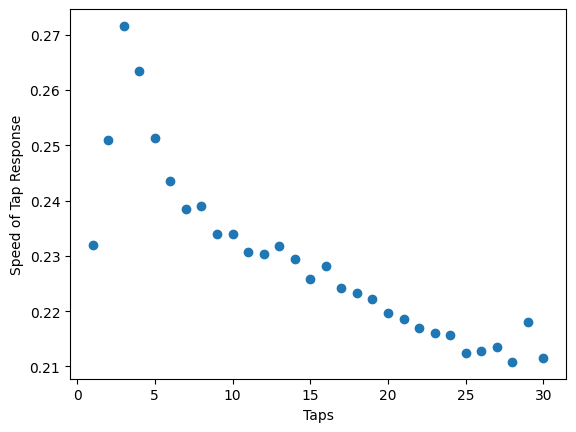

In [269]:
Metric = 'Speed of Tap Response'
plt.scatter(N2_mean.taps, N2_mean.speed, label='data')
plt.xlabel('Taps')
plt.ylabel(Metric)
plt.savefig('/Users/Joseph/Desktop/N2Speed.png', format='png', dpi=450, bbox_inches='tight')
plt.show()

In [198]:
def speed_func(x, a, b, c):
     return a * np.exp(-b * x) + c

In [270]:
popt, pcov = curve_fit(speed_func, N2_mean.taps[:-2], N2_mean.speed[2:])
print(popt)
print(pcov)
p_sigma = np.sqrt(np.diag(pcov))
print(p_sigma)
p_upp=popt+p_sigma
p_low=popt-p_sigma

[0.06091365 0.12894386 0.21273974]
[[ 7.74063841e-06  1.37960154e-05 -3.65626485e-07]
 [ 1.37960154e-05  2.42192456e-04  2.44073814e-05]
 [-3.65626485e-07  2.44073814e-05  3.30335355e-06]]
[0.0027822  0.01556253 0.00181751]


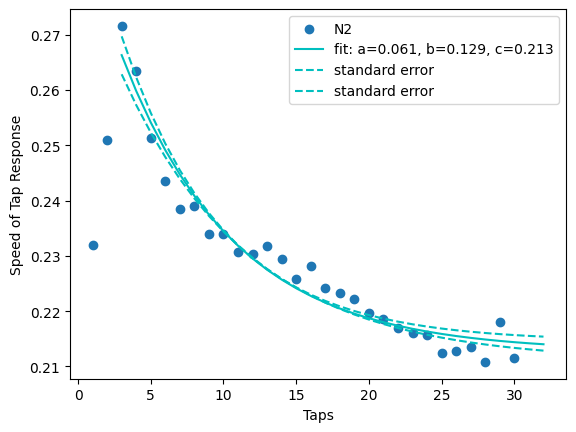

In [272]:
plt.scatter(N2_mean.taps, N2_mean.speed, label='N2')
plt.plot(N2_mean.taps+2, speed_func(N2_mean.taps, *popt), 'c-',
          label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(N2_mean.taps+2, speed_func(N2_mean.taps, *p_upp), 'c--',
          label='standard error')
plt.plot(N2_mean.taps+2, speed_func(N2_mean.taps, *p_low), 'c--',
          label='standard error')
plt.xlabel('Taps')
plt.ylabel(Metric)
plt.legend()
plt.savefig('/Users/Joseph/Desktop/N2Speed_fit.png', format='png', dpi=450, bbox_inches='tight')
plt.show()